In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

In [4]:
df = pd.read_csv("aircraft_birdstrike.csv")
df.head()

,Incident_Year,Incident_Month,Incident_Day,Operator,Aircraft,Aircraft_Type,Engines,Engine_Type,Airport,State,...,Precipitation,Height,Speed,Distance,Species_Name,Flight_Impact,Fatalities,Injuries,Aircraft_damaged,Total_damaged_parts
0,1990,1,1,DELTA AIR LINES,B-757-200,A,2.0,D,CINCINNATI/NORTHERN KENTUCKY INTL ARPT,KY,...,NaN,NaN,NaN,NaN,GULL,NaN,NaN,NaN,Yes,5
1,1990,1,1,HAWAIIAN AIR,DC-9,A,2.0,D,LIHUE ARPT,HI,...,NaN,0.0,NaN,0.0,HOUSE SPARROW,NaN,NaN,NaN,Yes,1
2,1990,1,3,MILITARY,F-16,A,NaN,NaN,JACKSONVILLE INTL,FL,...,NaN,100.0,200.0,NaN,FINCH,NaN,NaN,NaN,Yes,1
3,1990,1,4,HAWAIIAN AIR,DC-9,A,2.0,D,LIHUE ARPT,HI,...,NaN,0.0,NaN,0.0,MUNIAS,NaN,NaN,NaN,Yes,1
4,1990,1,8,1US AIRWAYS,B-737-200,A,2.0,D,ORLANDO INTL,FL,...,NONE,60.0,150.0,NaN,GULL,NaN,NaN,NaN,No,0


In [9]:
# Initial inspection
print(f"Dataset shape: {df.shape}")
print("\nColumns:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Dataset shape: (50543, 24)

Columns:
['Incident_Year', 'Incident_Month', 'Incident_Day', 'Operator', 'Aircraft', 'Aircraft_Type', 'Engines', 'Engine_Type', 'Airport', 'State', 'FAA Region', 'Warning_Issued', 'Flight_Phase', 'Visibility', 'Precipitation', 'Height', 'Speed', 'Distance', 'Species_Name', 'Flight_Impact', 'Fatalities', 'Injuries', 'Aircraft_damaged', 'Total_damaged_parts']

Data types:
Incident_Year            int64
Incident_Month           int64
Incident_Day             int64
Operator                object
Aircraft                object
Aircraft_Type           object
Engines                float64
Engine_Type             object
Airport                 object
State                   object
FAA Region              object
Warning_Issued          object
Flight_Phase            object
Visibility              object
Precipitation           object
Height                 float64
Speed                  float64
Distance               float64
Species_Name            object
Flight_Imp

In [13]:
df = df.copy()
# Create date column
df['Incident_Date'] = pd.to_datetime(
    df.rename(columns={
        'Incident_Year': 'year',
        'Incident_Month': 'month',
        'Incident_Day': 'day'
    })[['year', 'month', 'day']],
    errors='coerce'
)


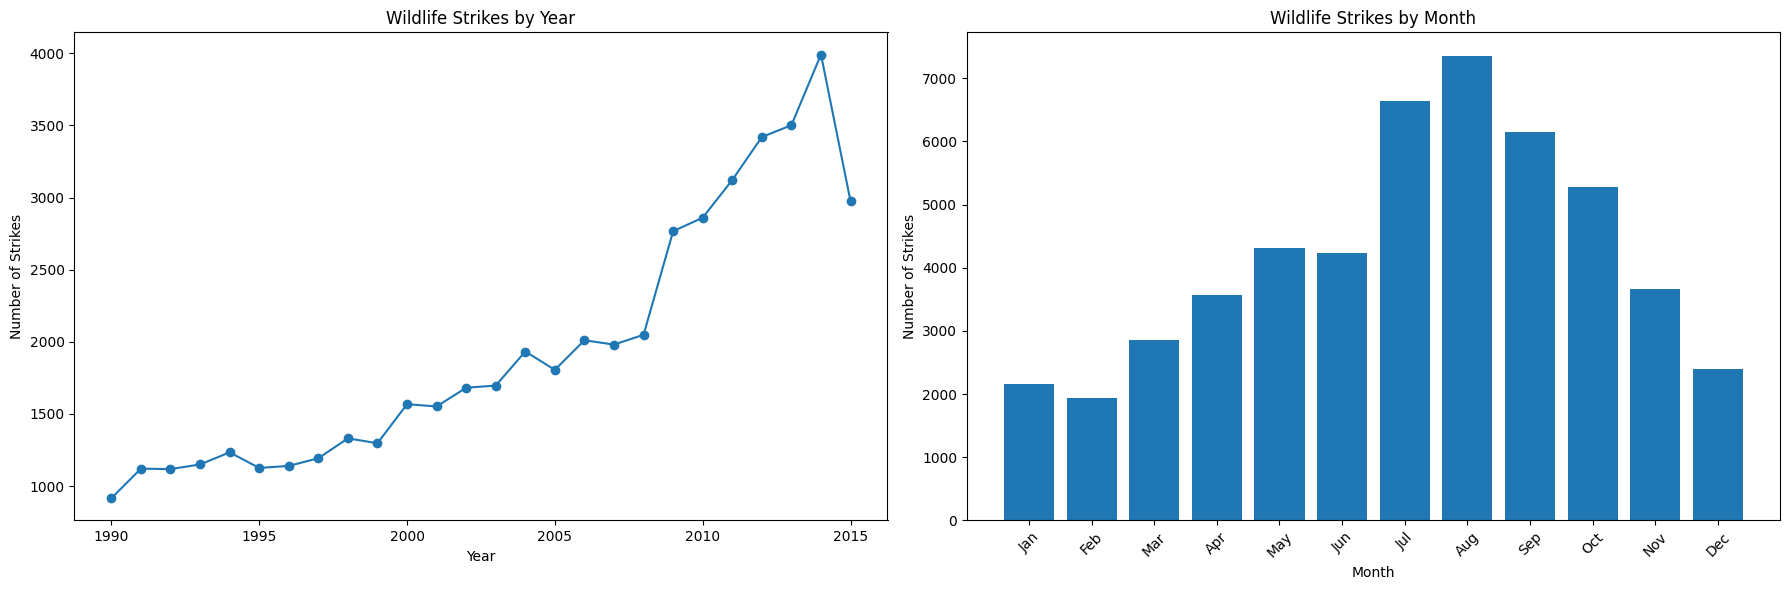

In [21]:
# Time series analysis
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# -----------------------
# Strikes by year (line)
# -----------------------
strikes_by_year = df['Incident_Year'].value_counts().sort_index()

axes[0].plot(
    strikes_by_year.index,
    strikes_by_year.values,
    marker='o'
)
axes[0].set_title('Wildlife Strikes by Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Strikes')

# -----------------------
# Strikes by month (bar)
# -----------------------
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

month_counts = df['Incident_Month'].value_counts().sort_index()

axes[1].bar(range(1, 13), month_counts.values)
axes[1].set_title('Wildlife Strikes by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Strikes')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(month_order, rotation=45)

plt.tight_layout()
plt.show()


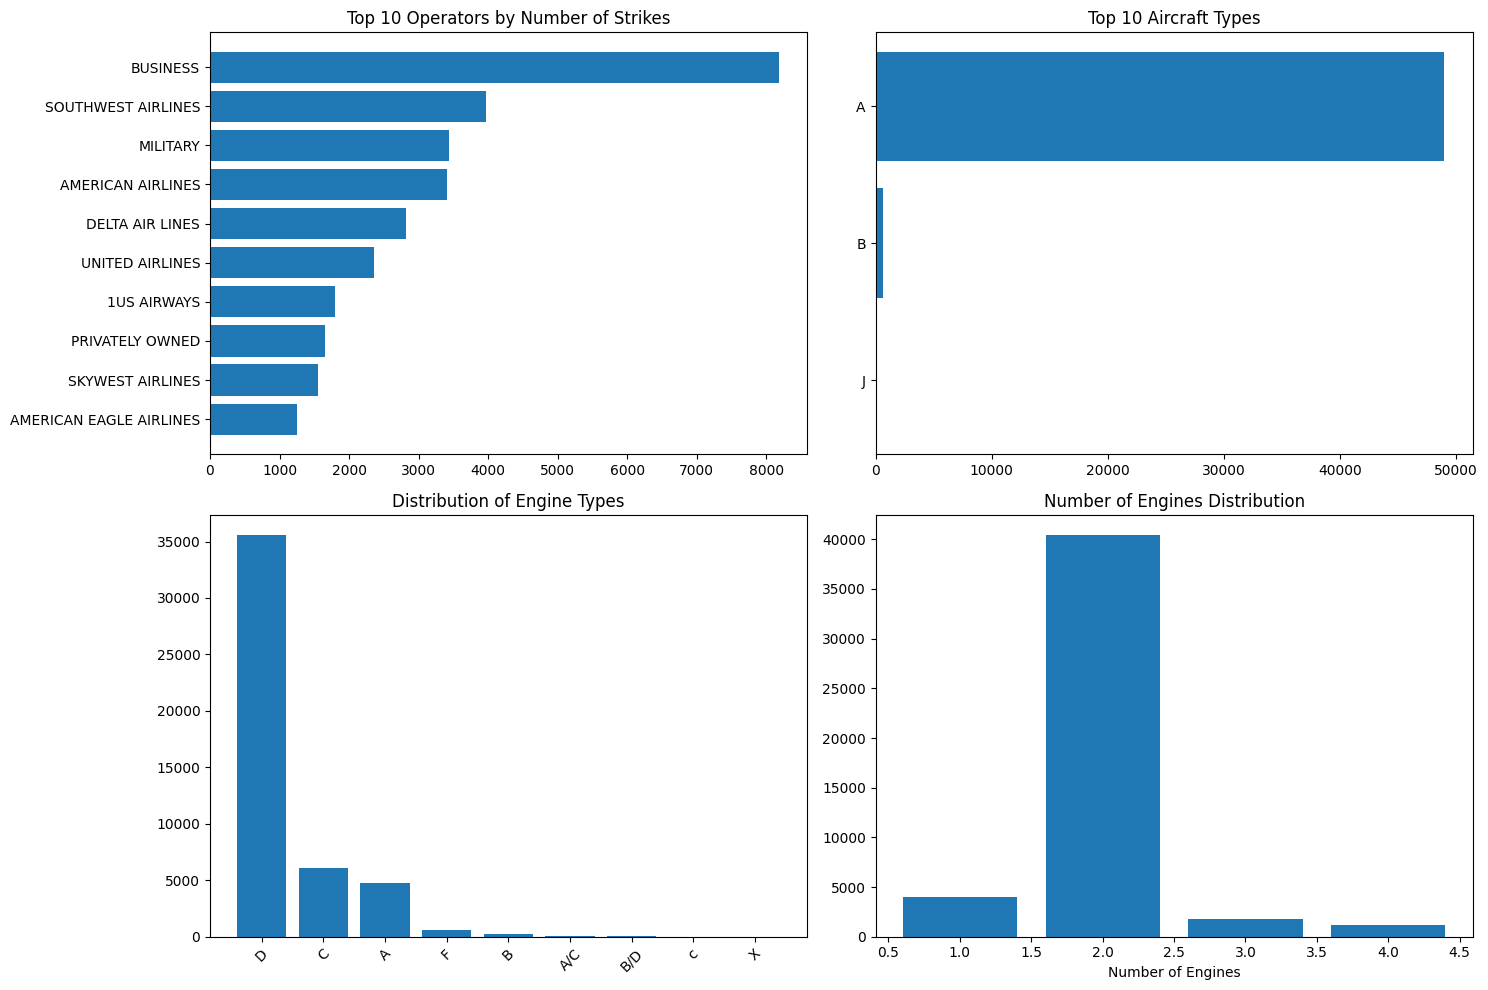

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Top 10 operators
top_operators = df['Operator'].value_counts().head(10)
axes[0,0].barh(range(len(top_operators)), top_operators.values)
axes[0,0].set_yticks(range(len(top_operators)))
axes[0,0].set_yticklabels(top_operators.index)
axes[0,0].set_title('Top 10 Operators by Number of Strikes')
axes[0,0].invert_yaxis()

# Aircraft types
top_aircraft_types = df['Aircraft_Type'].value_counts().head(10)
axes[0,1].barh(range(len(top_aircraft_types)), top_aircraft_types.values)
axes[0,1].set_yticks(range(len(top_aircraft_types)))
axes[0,1].set_yticklabels(top_aircraft_types.index)
axes[0,1].set_title('Top 10 Aircraft Types')
axes[0,1].invert_yaxis()

# Engine types
engine_counts = df['Engine_Type'].value_counts()
axes[1,0].bar(range(len(engine_counts)), engine_counts.values)
axes[1,0].set_xticks(range(len(engine_counts)))
axes[1,0].set_xticklabels(engine_counts.index, rotation=45)
axes[1,0].set_title('Distribution of Engine Types')

# Number of engines
engine_counts = df['Engines'].value_counts().sort_index()
axes[1,1].bar(engine_counts.index, engine_counts.values)
axes[1,1].set_title('Number of Engines Distribution')
axes[1,1].set_xlabel('Number of Engines')

plt.tight_layout()
plt.show()

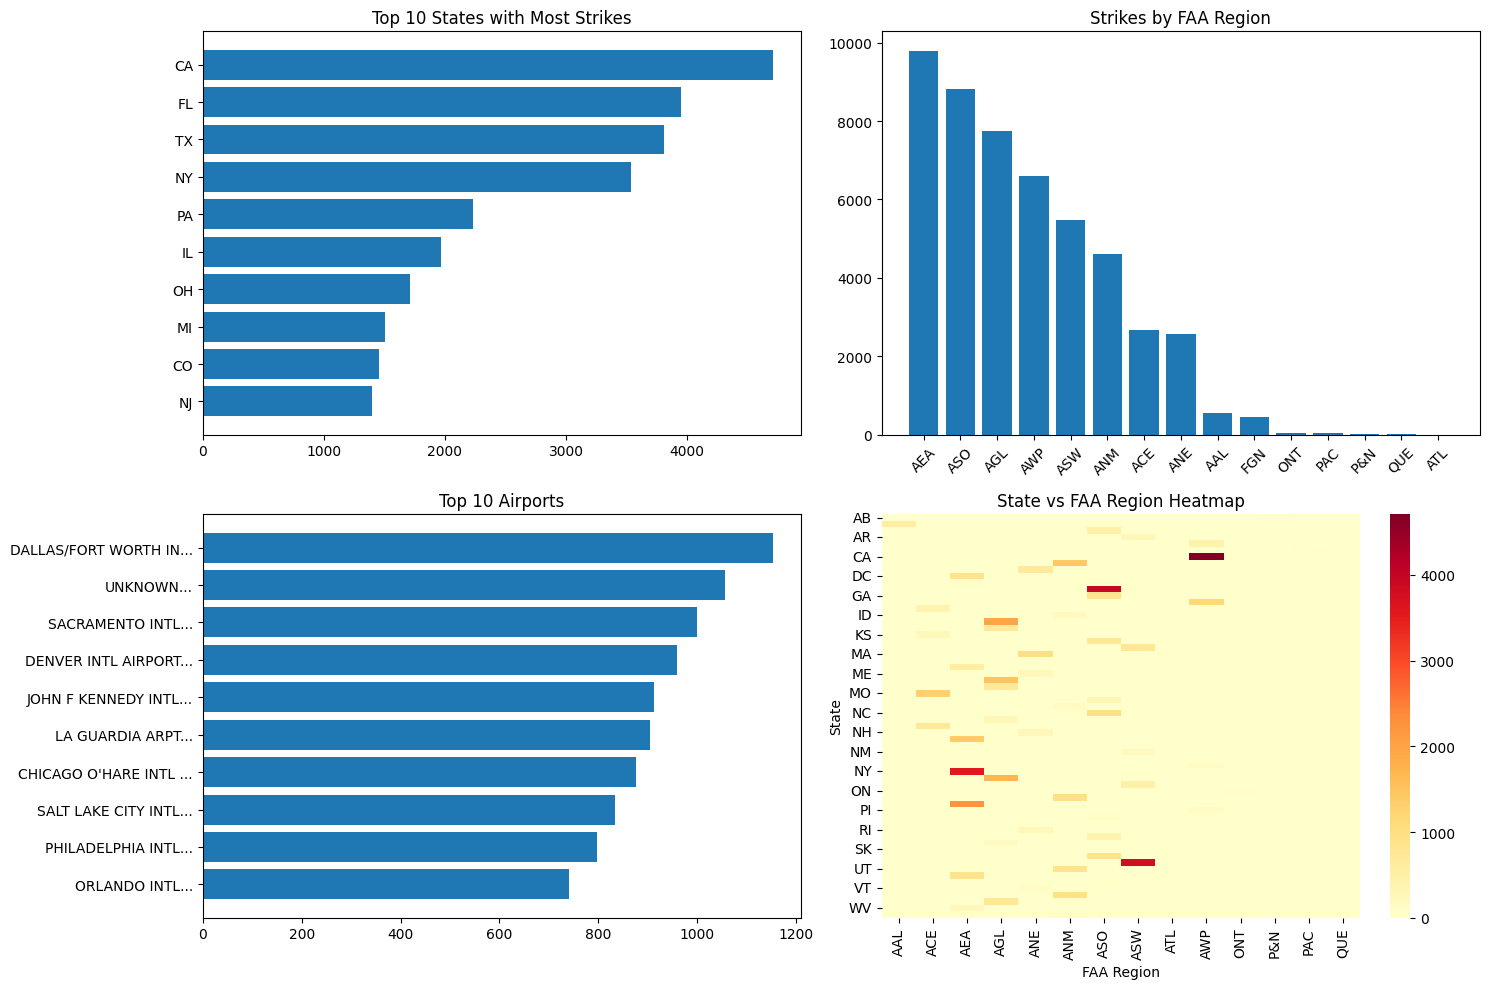

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Top 10 states
top_states = df['State'].value_counts().head(10)
axes[0,0].barh(range(len(top_states)), top_states.values)
axes[0,0].set_yticks(range(len(top_states)))
axes[0,0].set_yticklabels(top_states.index)
axes[0,0].set_title('Top 10 States with Most Strikes')
axes[0,0].invert_yaxis()

# FAA Regions
region_counts = df['FAA Region'].value_counts()
axes[0,1].bar(range(len(region_counts)), region_counts.values)
axes[0,1].set_xticks(range(len(region_counts)))
axes[0,1].set_xticklabels(region_counts.index, rotation=45)
axes[0,1].set_title('Strikes by FAA Region')

# Top 10 airports
top_airports = df['Airport'].value_counts().head(10)
axes[1,0].barh(range(len(top_airports)), top_airports.values)
axes[1,0].set_yticks(range(len(top_airports)))
axes[1,0].set_yticklabels([str(x)[:20] + '...' for x in top_airports.index])
axes[1,0].set_title('Top 10 Airports')
axes[1,0].invert_yaxis()

# State vs FAA Region heatmap
cross_tab = pd.crosstab(df['State'], df['FAA Region'])
sns.heatmap(cross_tab, ax=axes[1,1], cmap='YlOrRd')
axes[1,1].set_title('State vs FAA Region Heatmap')

plt.tight_layout()
plt.show()

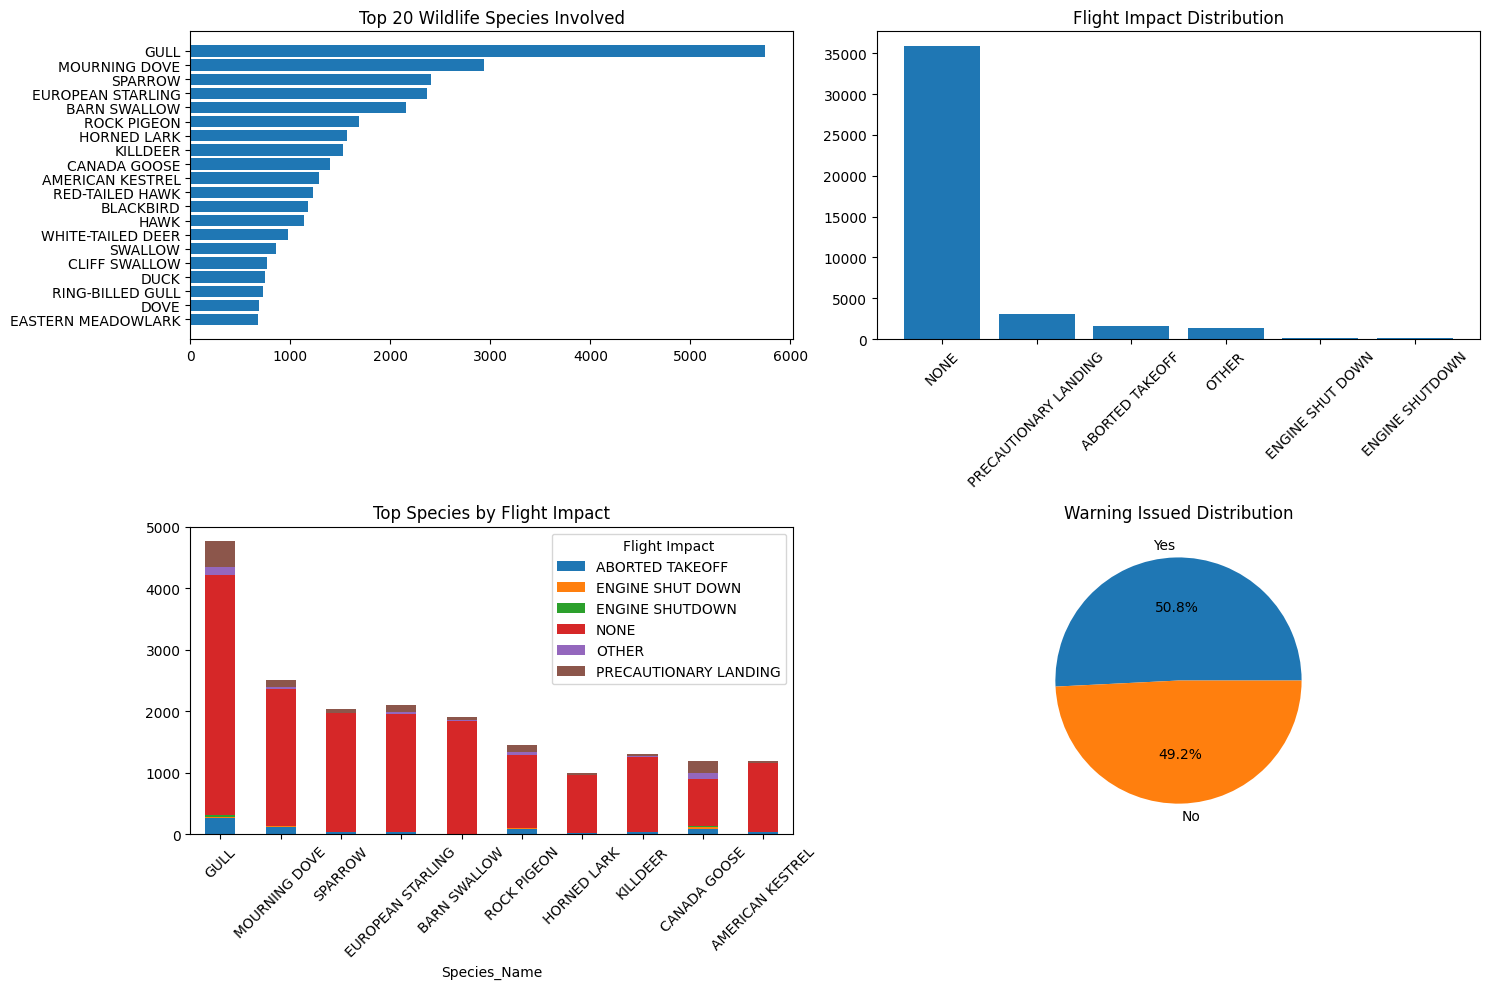

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Top 20 species involved
top_species = df['Species_Name'].value_counts().head(20)
axes[0,0].barh(range(len(top_species)), top_species.values)
axes[0,0].set_yticks(range(len(top_species)))
axes[0,0].set_yticklabels(top_species.index)
axes[0,0].set_title('Top 20 Wildlife Species Involved')
axes[0,0].invert_yaxis()

# Flight impact distribution
impact_counts = df['Flight_Impact'].value_counts()
axes[0,1].bar(range(len(impact_counts)), impact_counts.values)
axes[0,1].set_xticks(range(len(impact_counts)))
axes[0,1].set_xticklabels(impact_counts.index, rotation=45)
axes[0,1].set_title('Flight Impact Distribution')

# Species vs impact correlation
species_impact = pd.crosstab(df['Species_Name'], df['Flight_Impact'])
top_species_list = top_species.index[:10]
species_impact_top = species_impact.loc[top_species_list]
species_impact_top.plot(kind='bar', stacked=True, ax=axes[1,0])
axes[1,0].set_title('Top Species by Flight Impact')
axes[1,0].legend(title='Flight Impact')
axes[1,0].tick_params(axis='x', rotation=45)

# Warning issued analysis
warning_counts = df['Warning_Issued'].value_counts()
axes[1,1].pie(warning_counts.values, labels=warning_counts.index, autopct='%1.1f%%')
axes[1,1].set_title('Warning Issued Distribution')

plt.tight_layout()
plt.show()

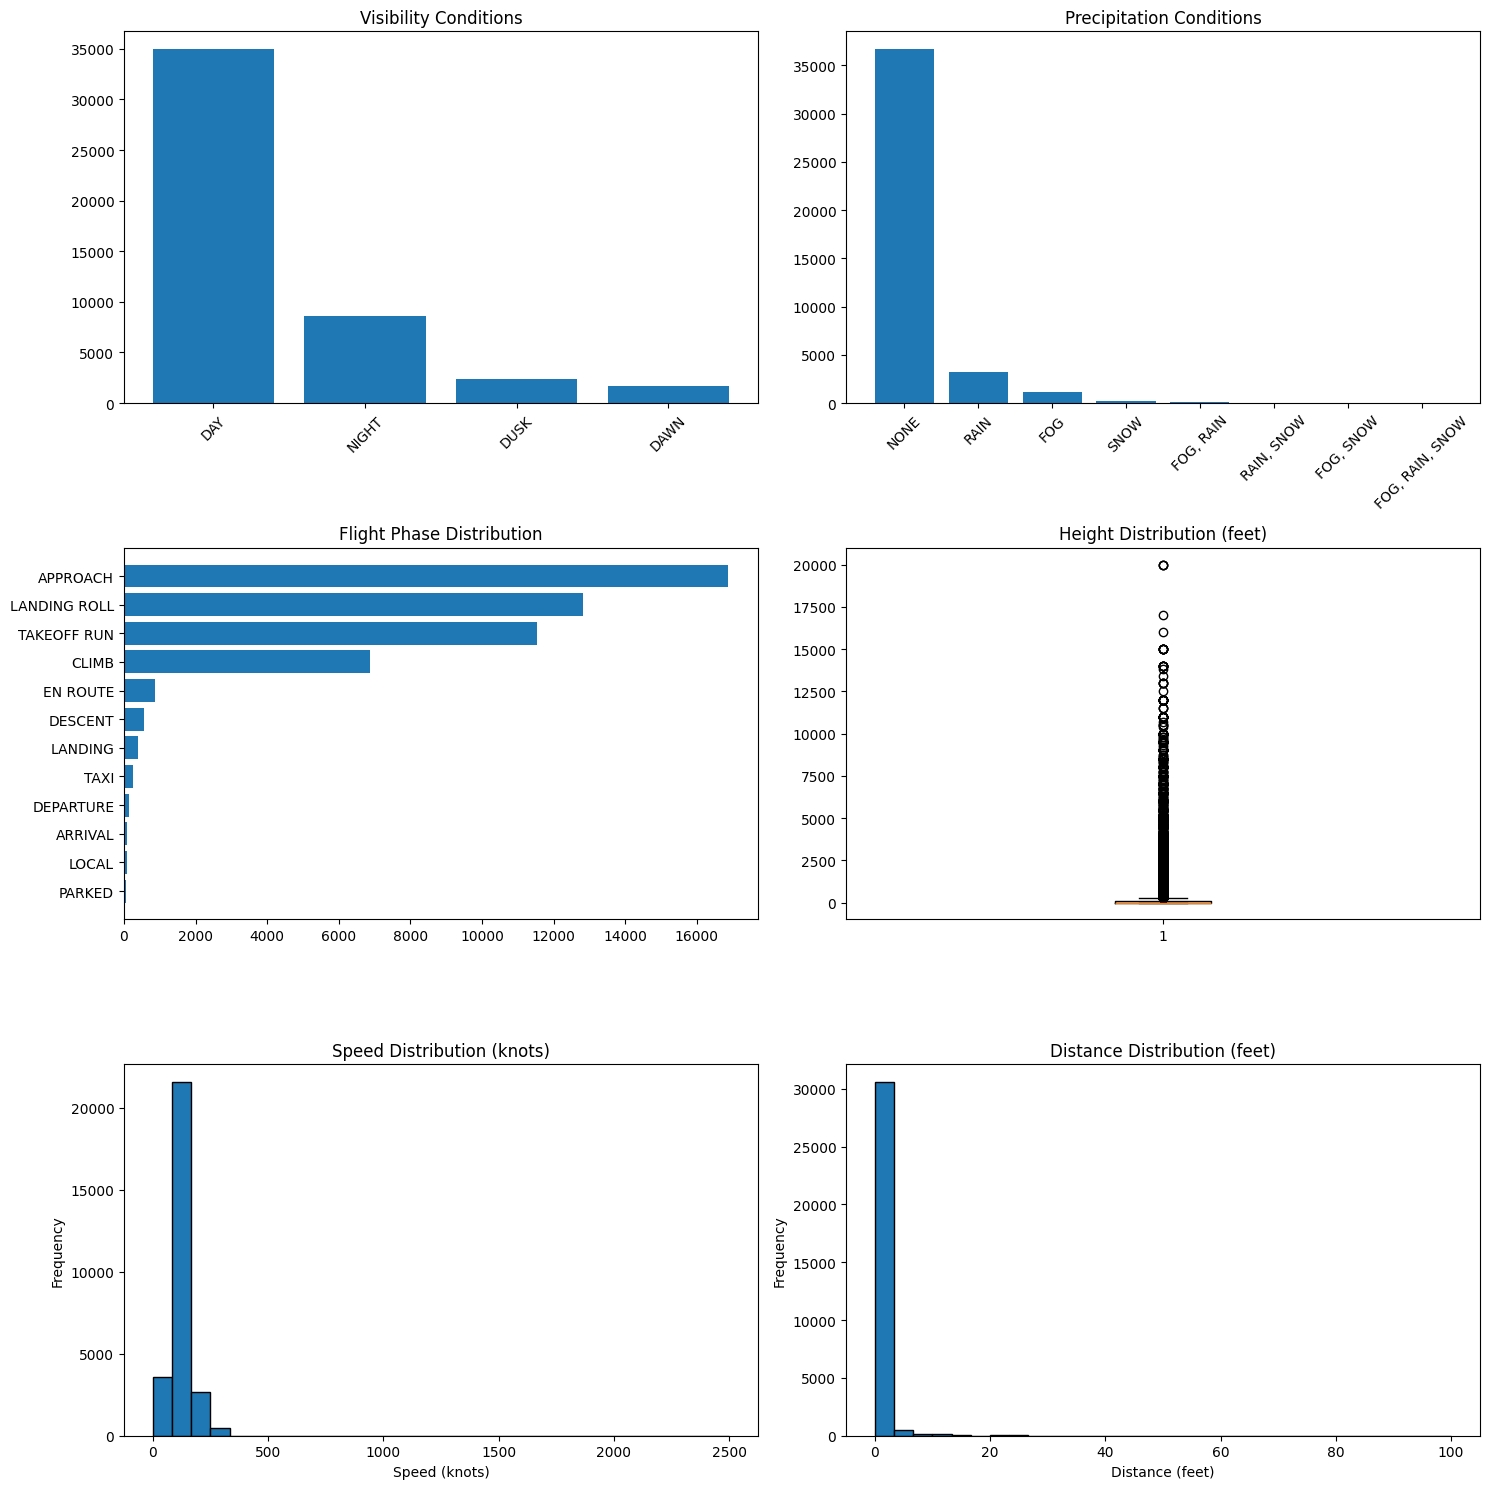

In [25]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Visibility conditions
visibility_counts = df['Visibility'].value_counts()
axes[0,0].bar(range(len(visibility_counts)), visibility_counts.values)
axes[0,0].set_xticks(range(len(visibility_counts)))
axes[0,0].set_xticklabels(visibility_counts.index, rotation=45)
axes[0,0].set_title('Visibility Conditions')

# Precipitation conditions
precipitation_counts = df['Precipitation'].value_counts()
axes[0,1].bar(range(len(precipitation_counts)), precipitation_counts.values)
axes[0,1].set_xticks(range(len(precipitation_counts)))
axes[0,1].set_xticklabels(precipitation_counts.index, rotation=45)
axes[0,1].set_title('Precipitation Conditions')

# Flight phase distribution
flight_phase_counts = df['Flight_Phase'].value_counts()
axes[1,0].barh(range(len(flight_phase_counts)), flight_phase_counts.values)
axes[1,0].set_yticks(range(len(flight_phase_counts)))
axes[1,0].set_yticklabels(flight_phase_counts.index)
axes[1,0].set_title('Flight Phase Distribution')
axes[1,0].invert_yaxis()

# Height distribution (box plot)
axes[1,1].boxplot(df['Height'].dropna())
axes[1,1].set_title('Height Distribution (feet)')

# Speed distribution
axes[2,0].hist(df['Speed'].dropna(), bins=30, edgecolor='black')
axes[2,0].set_title('Speed Distribution (knots)')
axes[2,0].set_xlabel('Speed (knots)')
axes[2,0].set_ylabel('Frequency')

# Distance distribution
axes[2,1].hist(df['Distance'].dropna(), bins=30, edgecolor='black')
axes[2,1].set_title('Distance Distribution (feet)')
axes[2,1].set_xlabel('Distance (feet)')
axes[2,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

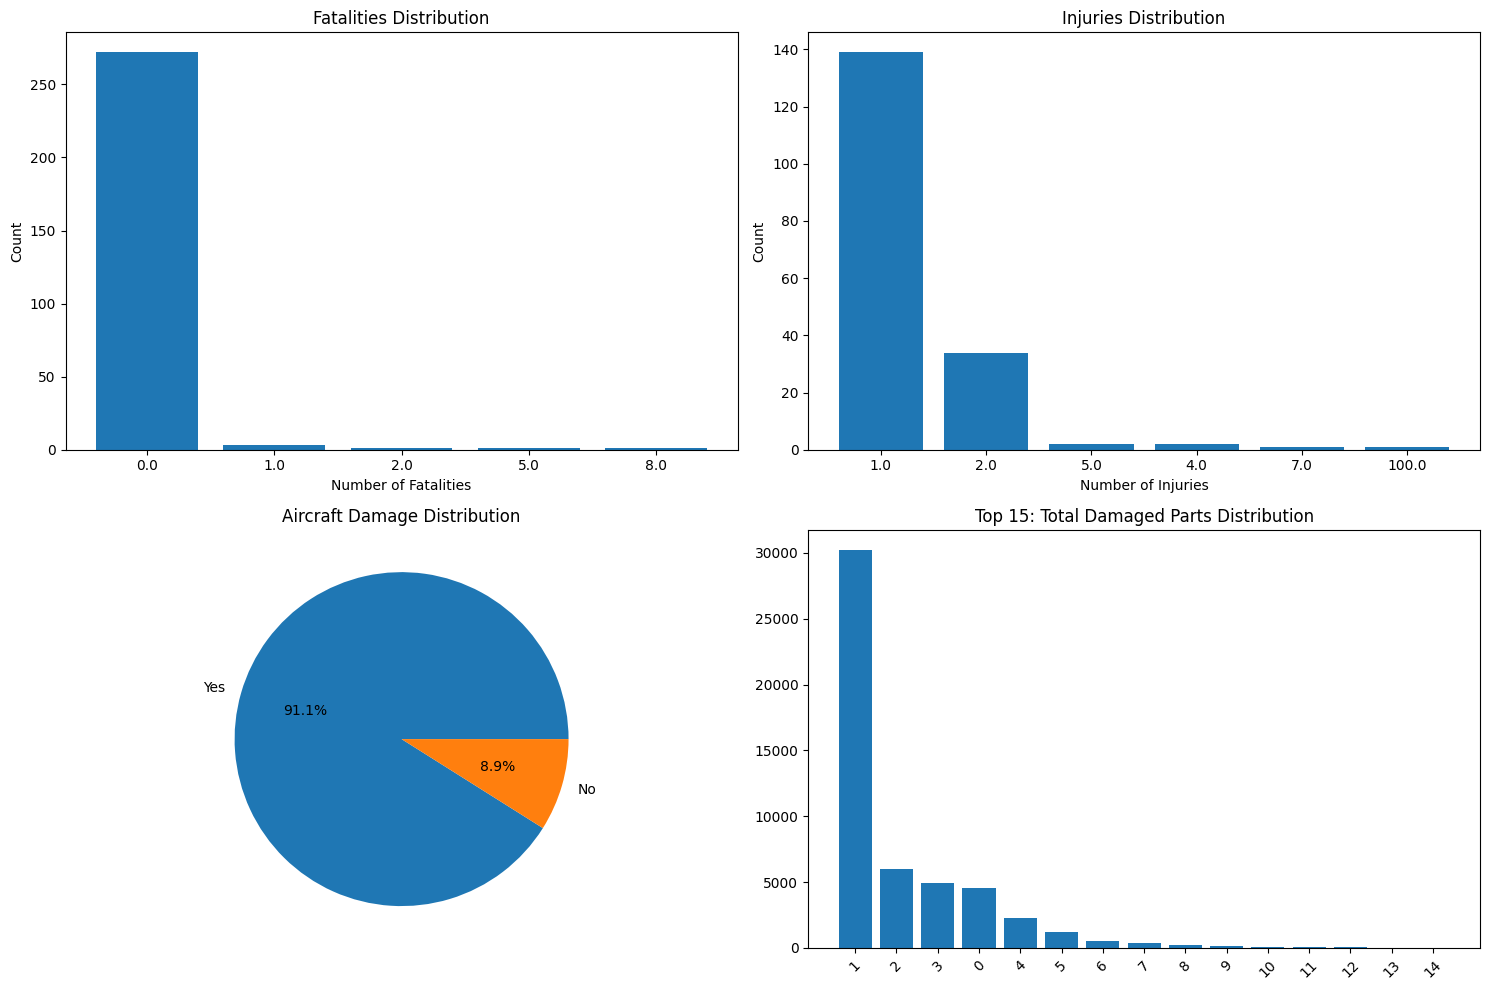

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Fatalities analysis
fatalities_dist = df['Fatalities'].value_counts().head(10)
axes[0,0].bar(fatalities_dist.index.astype(str), fatalities_dist.values)
axes[0,0].set_title('Fatalities Distribution')
axes[0,0].set_xlabel('Number of Fatalities')
axes[0,0].set_ylabel('Count')

# Injuries analysis
injuries_dist = df['Injuries'].value_counts().head(10)
axes[0,1].bar(injuries_dist.index.astype(str), injuries_dist.values)
axes[0,1].set_title('Injuries Distribution')
axes[0,1].set_xlabel('Number of Injuries')
axes[0,1].set_ylabel('Count')

# Aircraft damage
damage_counts = df['Aircraft_damaged'].value_counts()
axes[1,0].pie(damage_counts.values, labels=damage_counts.index, autopct='%1.1f%%')
axes[1,0].set_title('Aircraft Damage Distribution')

# Total damaged parts distribution
damaged_parts = df['Total_damaged_parts'].value_counts().head(15)
axes[1,1].bar(range(len(damaged_parts)), damaged_parts.values)
axes[1,1].set_xticks(range(len(damaged_parts)))
axes[1,1].set_xticklabels(damaged_parts.index, rotation=45)
axes[1,1].set_title('Top 15: Total Damaged Parts Distribution')

plt.tight_layout()
plt.show()

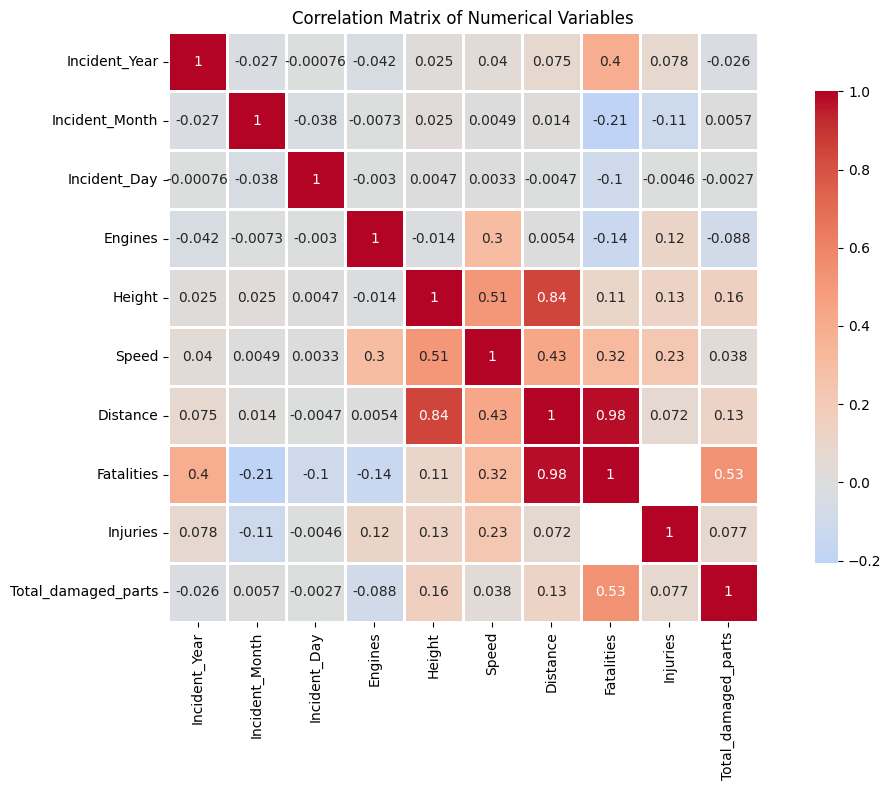


=== KEY INSIGHTS ===

Top 10 Most Dangerous Conditions:
                                       Fatalities  Injuries  \
Visibility Precipitation Flight_Phase                         
DAY        NONE          CLIMB                5.0     112.0   
                         EN ROUTE             1.0      53.0   
DAWN       FOG           APPROACH             0.0       0.0   
                         CLIMB                0.0       0.0   
                         TAKEOFF RUN          0.0       0.0   
           FOG, RAIN     APPROACH             0.0       0.0   
           FOG           DEPARTURE            0.0       0.0   
                         LANDING ROLL         0.0       0.0   
           FOG, RAIN     TAKEOFF RUN          0.0       0.0   
           NONE          APPROACH             0.0       0.0   

                                       Total_damaged_parts  
Visibility Precipitation Flight_Phase                       
DAY        NONE          CLIMB                    1.968234  
   

In [29]:
# Correlation matrix for numerical columns
numerical_cols = ['Incident_Year', 'Incident_Month', 'Incident_Day', 'Engines', 
                  'Height', 'Speed', 'Distance', 'Fatalities', 'Injuries', 
                  'Total_damaged_parts']

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

# Advanced: Multi-dimensional analysis
print("\n=== KEY INSIGHTS ===")

# Most dangerous conditions
danger_conditions = df.groupby(['Visibility', 'Precipitation', 'Flight_Phase']).agg({
    'Fatalities': 'sum',
    'Injuries': 'sum',
    'Total_damaged_parts': 'mean'
}).sort_values('Fatalities', ascending=False).head(10)

print("\nTop 10 Most Dangerous Conditions:")
print(danger_conditions)

# Species causing most damage
damaging_species = df.groupby('Species_Name').agg({
    'Total_damaged_parts': 'sum',
    'Fatalities': 'sum',
    'Injuries': 'sum'
}).sort_values('Total_damaged_parts', ascending=False).head(10)

print("\nTop 10 Most Damaging Species:")
print(damaging_species)

# Seasonal patterns of serious incidents
serious_incidents = df[(df['Fatalities'] > 0) | (df['Injuries'] > 0)]
seasonal_serious = serious_incidents['Operator'].value_counts()
print("\nSerious Incidents by Operator:")
print(seasonal_serious)

In [31]:
# Generate summary statistics
print("\n=== SUMMARY STATISTICS ===")

# Basic stats
print(f"\nTotal records: {len(df)}")
print(f"Time period: {df['Incident_Year'].min()} - {df['Incident_Year'].max()}")
print(f"Unique operators: {df['Operator'].nunique()}")
print(f"Unique aircraft types: {df['Aircraft_Type'].nunique()}")
print(f"Unique species: {df['Species_Name'].nunique()}")

# Safety stats
total_fatalities = df['Fatalities'].sum()
total_injuries = df['Injuries'].sum()
incidents_with_damage = df[df['Aircraft_damaged'] == 'Yes'].shape[0]

print(f"\nTotal fatalities: {total_fatalities}")
print(f"Total injuries: {total_injuries}")
print(f"Incidents with aircraft damage: {incidents_with_damage} ({incidents_with_damage/len(df)*100:.1f}%)")

# Missing data analysis
missing_percentage = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
print("\nMissing Data Percentage:")
print(missing_percentage.head(10))


=== SUMMARY STATISTICS ===

Total records: 50543
Time period: 1990 - 2015
Unique operators: 468
Unique aircraft types: 3
Unique species: 614

Total fatalities: 18.0
Total injuries: 332.0
Incidents with aircraft damage: 46021 (91.1%)

Missing Data Percentage:
Injuries          99.645846
Fatalities        99.449973
Speed             43.946738
Distance          37.253428
Warning_Issued    32.059830
Precipitation     18.053934
Flight_Impact     16.326692
Height            10.248699
Engine_Type        6.390598
Engines            6.343114
dtype: float64
